<a href="https://colab.research.google.com/github/mariacmartins/datascience-bootcamp-womakerscode/blob/master/Modelos_regressivos_bootcamp_WoMakersCode_(aula_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelos regressivos

![](https://media.giphy.com/media/QmJ3e9So5M9NdNkOGo/giphy.gif)

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


###Execícios de Regressão linear

**1. Treine uma regressão linear usando a biblioteca sklearn utilizando um dataset de aluguéis de bicicletas**

* Calcule os erros utilizando MSE, MAE e R²

* Com base nesse resultado, responda: O modelo está bem acurado?

Responda: 

* Qual variável contribui mais para esse modelo? E qual contribui menos?

* Retire a variável que contribui menos e treine novamente a regressão. O modelo ficou melhor? 

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [0]:
url = 'https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/3.%20Modelos%20regressivos/Exercicio_Regressao/day.csv'

In [0]:
df = pd.read_csv(url)

In [0]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,cnt
0,1,0,1,0,6,0,985
1,1,0,1,0,0,0,801
2,1,0,1,0,1,1,1349
3,1,0,1,0,2,1,1562
4,1,0,1,0,3,1,1600


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
cnt           731 non-null int64
dtypes: int64(7)
memory usage: 40.1 KB


In [0]:
#separando os dados em 4 dataframes diferentes(X: variáveis independentes, y: variável resposta)
#com 30% dos dados sendo usados para teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(df.drop(columns='cnt'), df['cnt'], test_size=0.3)

In [0]:
lr = LinearRegression() #Criando a regressão
lr.fit(X_treino, y_treino) #Ajustando/treinando o modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predito = lr.predict(X_teste) #predito é um vetor com todos os valores preditos pelo modelo

In [0]:
predito[:5]

array([4452.728594  , 6053.99916384, 4694.67333777, 4798.33011986,
       2671.75048193])

In [0]:
print('R²: ', lr.score(X_teste, y_teste))

R²:  0.4782729039809177


In [0]:
print('MSE: ', mean_squared_error(y_teste, predito))

MSE:  1983344.6705639032


In [0]:
print('MAE: ', mean_absolute_error(y_teste, predito))

MAE:  1196.1982546736492


In [0]:
lr.coef_ #coeficientes de cada variável independente

array([1023.39710628, 2131.97057138, -123.52735169, -331.12188971,
         98.54682247,  228.25629865])

In [0]:
for i,coef in enumerate(lr.coef_):
    print(df.columns[i],' : ', coef)

season  :  1023.3971062836274
yr  :  2131.970571380867
mnth  :  -123.52735169173434
holiday  :  -331.12188970631894
weekday  :  98.54682247317078
workingday  :  228.25629864549197


Variável que contribui menos: valor mais próximo de 0

Variável que contribui mais: maior valor

In [0]:
lr.intercept_


1242.5930278216942

In [0]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df.drop(columns=['cnt','weekday']), df['cnt'], test_size=0.3) 
#Retire a variável que contribui menos e treine novamente a regressão. 

In [0]:
lr = LinearRegression()
lr.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predito = lr.predict(X_teste)

In [0]:
print('R²: ', lr.score(X_teste, y_teste))

R²:  0.5141437165368424


In [0]:
print('MSE: ', mean_squared_error(y_teste, predito))

MSE:  1907971.5842023394


In [0]:

print('MAE: ', mean_absolute_error(y_teste, predito))

MAE:  1167.0632818292847


In [0]:
for i,coef in enumerate(lr.coef_):
    print(df.columns[i],' : ', coef)

season  :  988.5226731693197
yr  :  2172.3784735679833
mnth  :  -120.31108842875301
holiday  :  -402.75747916043
weekday  :  256.9167585924692


### Utilizando regressão linear para prever a expectativa de vida usando o Índice de Massa Corporal

Neste exercício, você trabalhará com dados sobre a expectativa média de vida ao nascer e o IMC médio. Os dados são do Gapminder.

O arquivo possui três colunas, contendo os seguintes dados:

País: 
* O país em que a pessoa nasceu. 

Expectativa de vida: 
* A expectativa média de vida no nascimento de uma pessoa naquele país. 

IMC:
* O IMC médio naquele país.




Preveja usando um IMC de 21.07931 e atribua-o à variável laos_life_exp.

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [0]:
url = 'https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/3.%20Modelos%20regressivos/Exercicio_1/bmi_and_life_expectancy.csv'

In [0]:
bmi_life_data = pd.read_csv(url)

In [0]:
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [0]:
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
laos_life_exp = bmi_life_model.predict([[21.07931]])


In [0]:
print(laos_life_exp)


[[60.31564716]]


# Regressão Polinomial 

Agora vamos tentar praticar um pouco sobre como implementar regressão polinomial. No arquivo data.csv você poderá encontrar dados gerados para um feature preditora ('Var_X') e a feature de saída ('Var_Y'), seguindo um padrão não-linear.

Use a classe PolynomialFeatures do sklearn's para estender a coluna de feature de previsão em várias colunas com recursos polinomiais. Brinque com diferentes graus de polinômio e use o botão Test Run para ver o que melhor se encaixa.

Para concluir, siga as etapas abaixo:

1. **Carregue os dados**

  Os dados estão no arquivo chamado 'data.csv'. Observe que esses dados têm uma linha de cabeçalho. Certifique-se de dividir os dados na feature de previsão em X e na feature de resultado em y. Para X, verifique se ele está em uma matriz bidimensional de 20 linhas por 1 coluna. Pode ser necessário usar a função de remodelação do NumPy para fazer isso.

2. **Crie recursos polinomiais**

  Crie uma instância da classe PolynomialFeatures do sklearn e atribua-a à variável poly_feat. Preste atenção em como definir o grau de recursos, pois será assim que o exercício será avaliado. Crie os recursos polinomiais usando o método .fit_transform () do objeto PolynomialFeatures. O lado "apto" do método considera quantos recursos são necessários na saída e o lado "transformação" aplica essas considerações aos dados fornecidos ao método como argumento. Atribua a nova matriz de recurso à variável X_poly.

3. **Construa um modelo de regressão polinomial**

  Crie um modelo de regressão polinomial combinando a classe LinearRegression do sklearn com os recursos polinomiais. Atribua o modelo de ajuste ao poly_model.

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [0]:
train_data = pd.read_csv('https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/3.%20Modelos%20regressivos/Exercicio_3/data.csv')

In [129]:
train_data.head()

,Var_X,Var_Y
0,-0.33532,6.66854
1,0.02160,3.86398
2,-1.19438,5.16161
3,-0.65046,8.43823
4,-0.28001,5.57201


In [0]:
#Crie a variável do preditor e de saída. 
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values

In [131]:
X

array([[-0.33532],
       [ 0.0216 ],
       [-1.19438],
       [-0.65046],
       [-0.28001],
       [ 1.93258],
       [ 1.2262 ],
       [ 0.74727],
       [ 3.32853],
       [ 2.87457],
       [-1.48662],
       [ 0.37629],
       [ 1.43918],
       [ 0.24183],
       [-2.7914 ],
       [ 1.08176],
       [ 2.81555],
       [ 0.54924],
       [ 2.36449],
       [-1.01925]])

In [132]:
y

array([  6.66854,   3.86398,   5.16161,   8.43823,   5.57201, -11.1327 ,
        -5.31226,  -4.63725,   3.8065 ,  -6.06084,   7.22328,   2.38887,
        -7.13415,   2.00412,   4.29794,  -5.86553,  -5.20711,  -3.52863,
       -10.16202,   5.31123])

In [0]:
#Crie as features polinomiais e depois faça um fit e transform na feature preditora
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

In [134]:
X_poly

array([[ 1.00000000e+00, -3.35320000e-01,  1.12439502e-01,
        -3.77032139e-02,  1.26426417e-02],
       [ 1.00000000e+00,  2.16000000e-02,  4.66560000e-04,
         1.00776960e-05,  2.17678234e-07],
       [ 1.00000000e+00, -1.19438000e+00,  1.42654358e+00,
        -1.70383513e+00,  2.03502660e+00],
       [ 1.00000000e+00, -6.50460000e-01,  4.23098212e-01,
        -2.75208463e-01,  1.79012097e-01],
       [ 1.00000000e+00, -2.80010000e-01,  7.84056001e-02,
        -2.19543521e-02,  6.14743813e-03],
       [ 1.00000000e+00,  1.93258000e+00,  3.73486546e+00,
         7.21792628e+00,  1.39492200e+01],
       [ 1.00000000e+00,  1.22620000e+00,  1.50356644e+00,
         1.84367317e+00,  2.26071204e+00],
       [ 1.00000000e+00,  7.47270000e-01,  5.58412453e-01,
         4.17284874e-01,  3.11824468e-01],
       [ 1.00000000e+00,  3.32853000e+00,  1.10791120e+01,
         3.68771565e+01,  1.22746722e+02],
       [ 1.00000000e+00,  2.87457000e+00,  8.26315268e+00,
         2.37530108e+01

In [0]:
#Crie e dê fit no modelo de regressão polinomial
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

In [136]:
print('R²:', poly_model.score(X_poly, y))

R²: 0.9532581924980009


In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_data = pd.read_csv('https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/3.%20Modelos%20regressivos/Exercicio_3/data.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)


In [162]:
X_novo = train_data['Var_X'].values
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

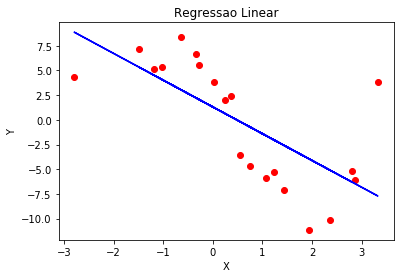

In [170]:
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Regressao Linear')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

viz_linear()

In [0]:
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

In [0]:
ploy_reg = LinearRegression()
poly_model = ploy_reg.fit(X_poly, y)

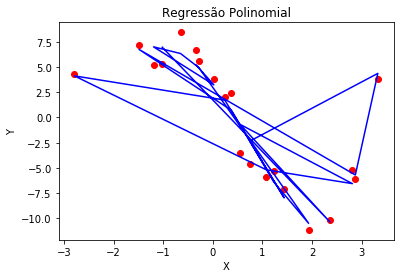

In [171]:
def viz_poly():
    plt.scatter(X, y, color='red')
    plt.plot(X, ploy_reg.predict(X_poly), color='blue')
    plt.title('Regressão Polinomial')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

viz_poly()

# Feature Scaling

Agora vamos tentar praticar um pouco sobre como normalizar nossos dados. User a classe StanderScaler do Sklearn para estandatizar antes de uma regressão linear.

Para concluir, siga as etapas abaixo:

1. **Carregue os dados**

  Os dados estão no arquivo chamado 'data.csv'. Observe que não há linha de cabeçalho neste arquivo. Divida os dados para que os seis features preditoras (primeiras seis colunas) sejam armazenados em X e o resultado (última coluna) seja armazenado em y.

2. **Execute o dimensionamento de recursos nos dados via padronização**

  Crie uma instância do StandardScaler do sklearn e atribua a variavel scaler. Calcule os parâmetros de dimensionamento usando o método .fit_transform () na matriz de recursos do preditor, que também retorna as variáveis do preditor em seus valores padronizados. Armazene esses valores padronizados em X_scaled.

3. **Ajustar dados usando regressão linear com regularização de Lasso**

  Crie uma instância da classe Lasso do sklearn e atribua-a à variável lasso_reg. Você não precisa definir nenhum valor de parâmetro: use os valores padrão para o questionário. Use o método .fit () do objeto Lasso para ajustar o modelo de regressão aos dados. Certifique-se de aplicar o ajuste aos dados padronizados da etapa anterior (X_scaled), não aos dados originais.

4. **Inspecione os coeficientes do modelo de regressão**

  Obtenha os coeficientes do modelo de regressão de ajuste usando o atributo .coef_ do objeto Lasso. Armazene isso na variável reg_coef: os coeficientes serão impressos

In [0]:
#Importe as bibliotecas que irá usar
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [0]:
train_data = pd.read_csv('https://raw.githubusercontent.com/WoMakersCode/data-science-bootcamp/master/3.%20Modelos%20regressivos/Exercicio_4/data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [0]:
X_treino, X_teste, y_treino, y_teste = train_test_split(train_data.iloc[:,:-1], train_data.iloc[:,-1], test_size=0.3)

In [0]:

#Crie o objeto de normalização
scaler = StandardScaler()

In [0]:
#Crie e de fit do objeto de normalização
X_scaled = scaler.fit_transform(X_treino)

In [0]:
lr = LinearRegression()

In [207]:
#Dê um fit no seu modelo
lr.fit(X_scaled, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
#Pegue e imprima os coeficientes do seu modelo de regressão.
reg_coef = lr.coef_
print(reg_coef)

[ -0.05406792   4.96636333   9.67874028  -0.68075741 -11.96567766
   1.77142283]


In [0]:
predito = lr.predict(X_teste)


In [210]:
predito[:5]


array([ 72.79077263, -68.95833579,  64.98387668, -51.14973212,
       -60.86737071])

In [211]:
print('R²: ', lr.score(X_teste, y_teste))

R²:  -5.289588629487875


In [212]:
print('MSE: ', mean_squared_error(y_teste, predito))

MSE:  2008.6290402994068


In [213]:
print('MAE: ', mean_absolute_error(y_teste, predito))

MAE:  36.866724288903114


In [214]:
lr.coef_


array([ -0.05406792,   4.96636333,   9.67874028,  -0.68075741,
       -11.96567766,   1.77142283])

In [215]:
for i,coef in enumerate(lr.coef_):
    print(train_data.columns[i],' : ', coef)

0  :  -0.05406791989265848
1  :  4.966363326956316
2  :  9.678740278624716
3  :  -0.680757405701423
4  :  -11.965677658765557
5  :  1.7714228260832319
